<a href="https://colab.research.google.com/github/aravindan155/AKumaranProjects/blob/main/Thyroid_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview:
Shape: (500, 9)

First 5 rows:
  Family_History Radiation_Exposure Iodine_Deficiency  \
0             No                 No                No   
1            Yes                 No                No   
2             No                 No               Yes   
3             No                 No               Yes   
4             No                 No               Yes   

  Previous_Thyroid_Condition Genetic_Mutation        Age  TSH_Level  \
0                         No               No  52.816836   2.772679   
1                         No               No  54.678234   2.038574   
2                         No               No  53.334067   3.044311   
3                         No               No  46.343710   3.058378   
4                         No               No  42.039924   2.182739   

         BMI Thyroid_Cancer_Risk  
0  23.884089                  No  
1  21.773769                 Yes  
2  30.892332                  No  
3  24.964582                 Yes  
4  27.

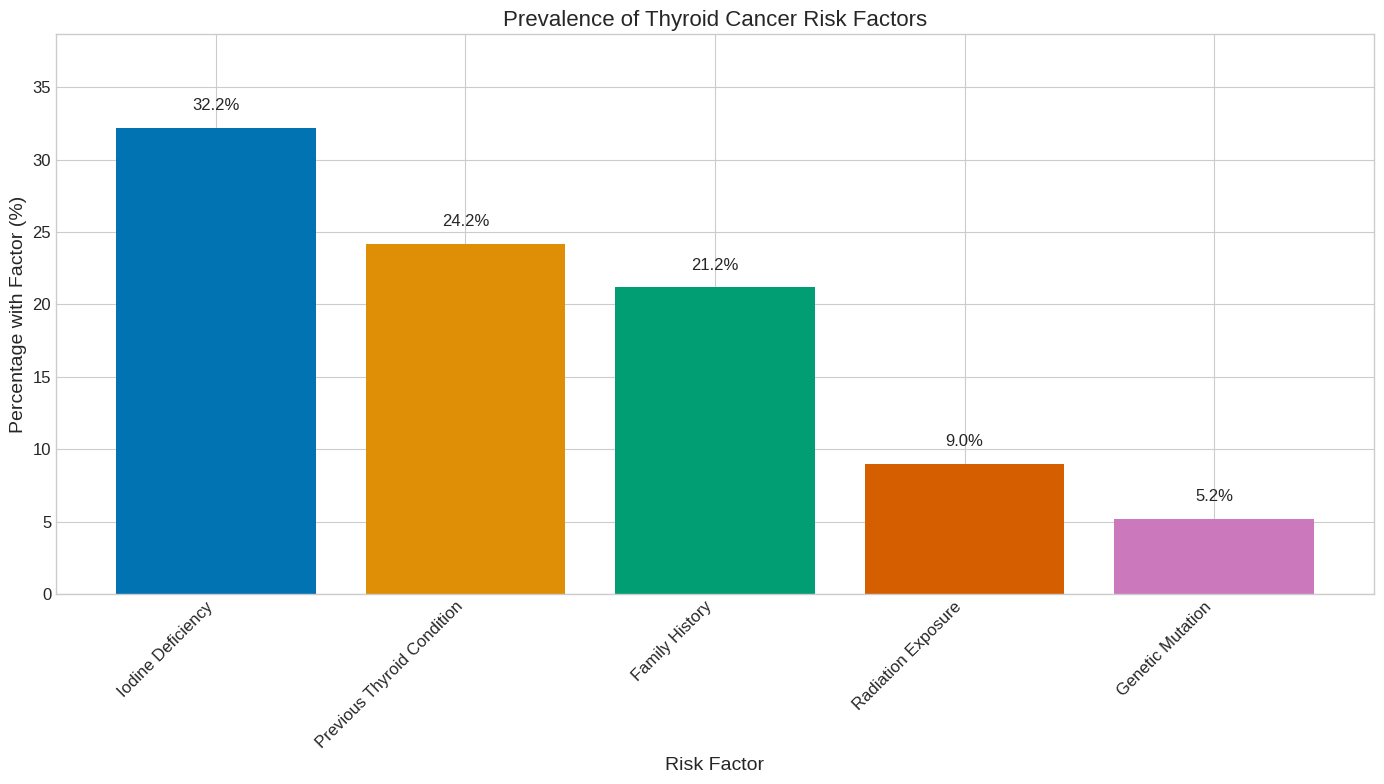

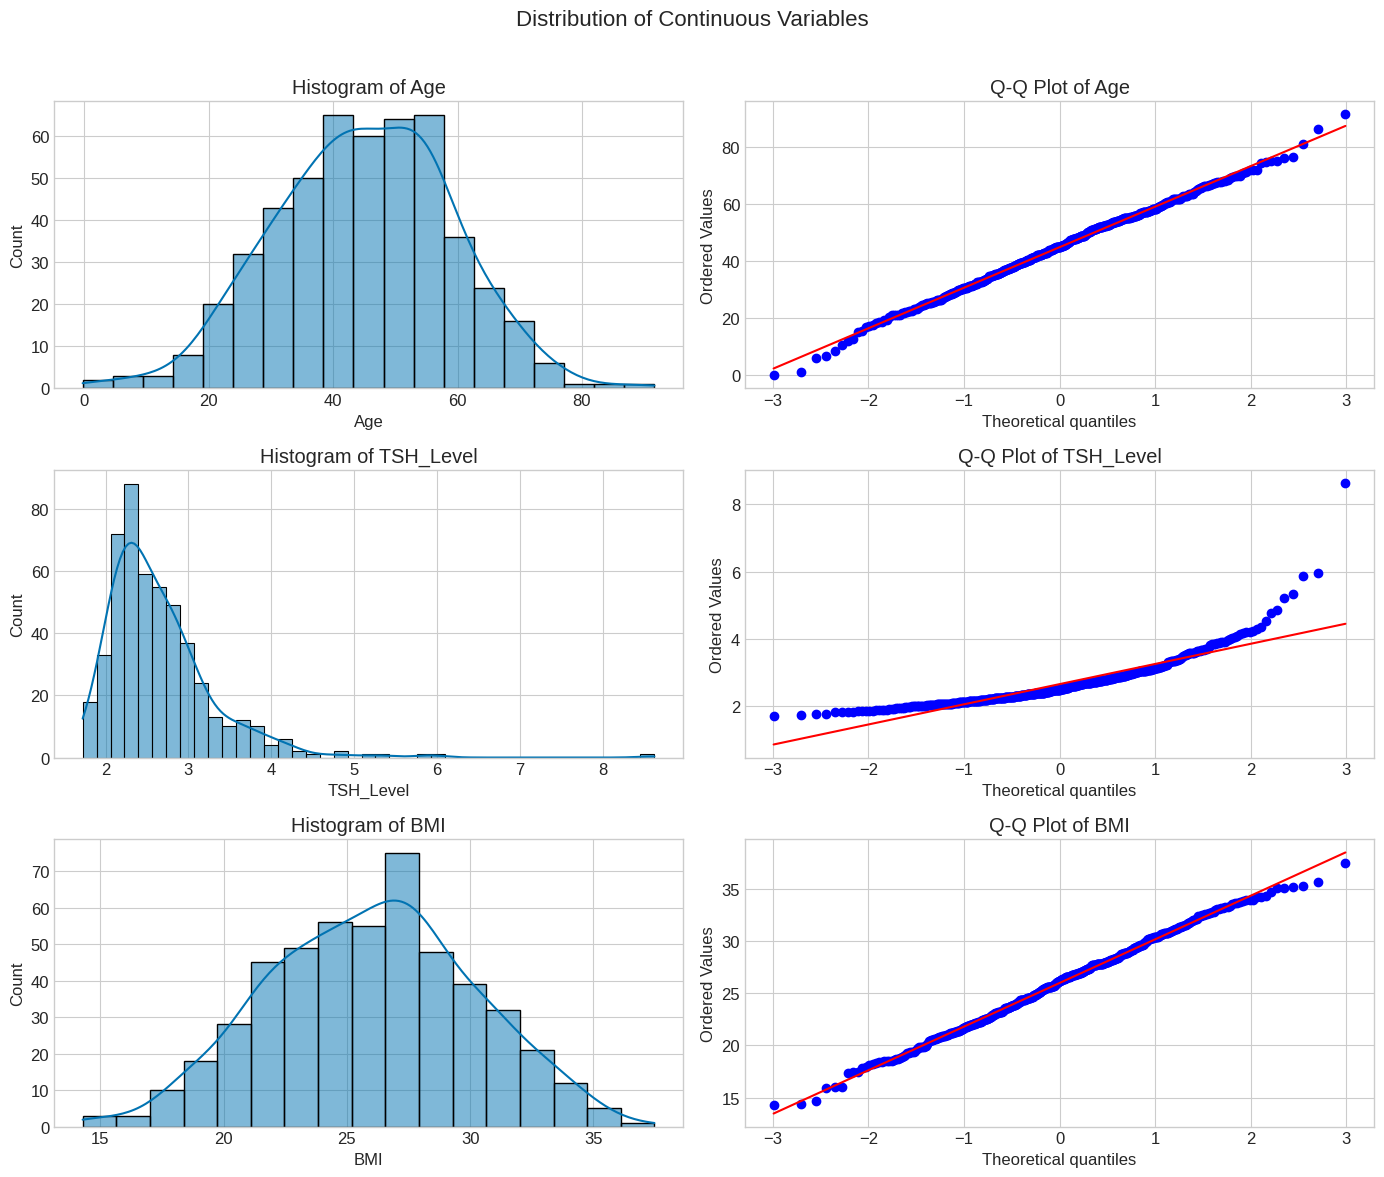


Shapiro-Wilk Test for Normality:
Age: Statistic=0.9978, p-value=0.7573
  Age appears to be normally distributed (p >= 0.05)

TSH_Level: Statistic=0.8134, p-value=0.0000
  TSH_Level is NOT normally distributed (p < 0.05)

BMI: Statistic=0.9968, p-value=0.4303
  BMI appears to be normally distributed (p >= 0.05)



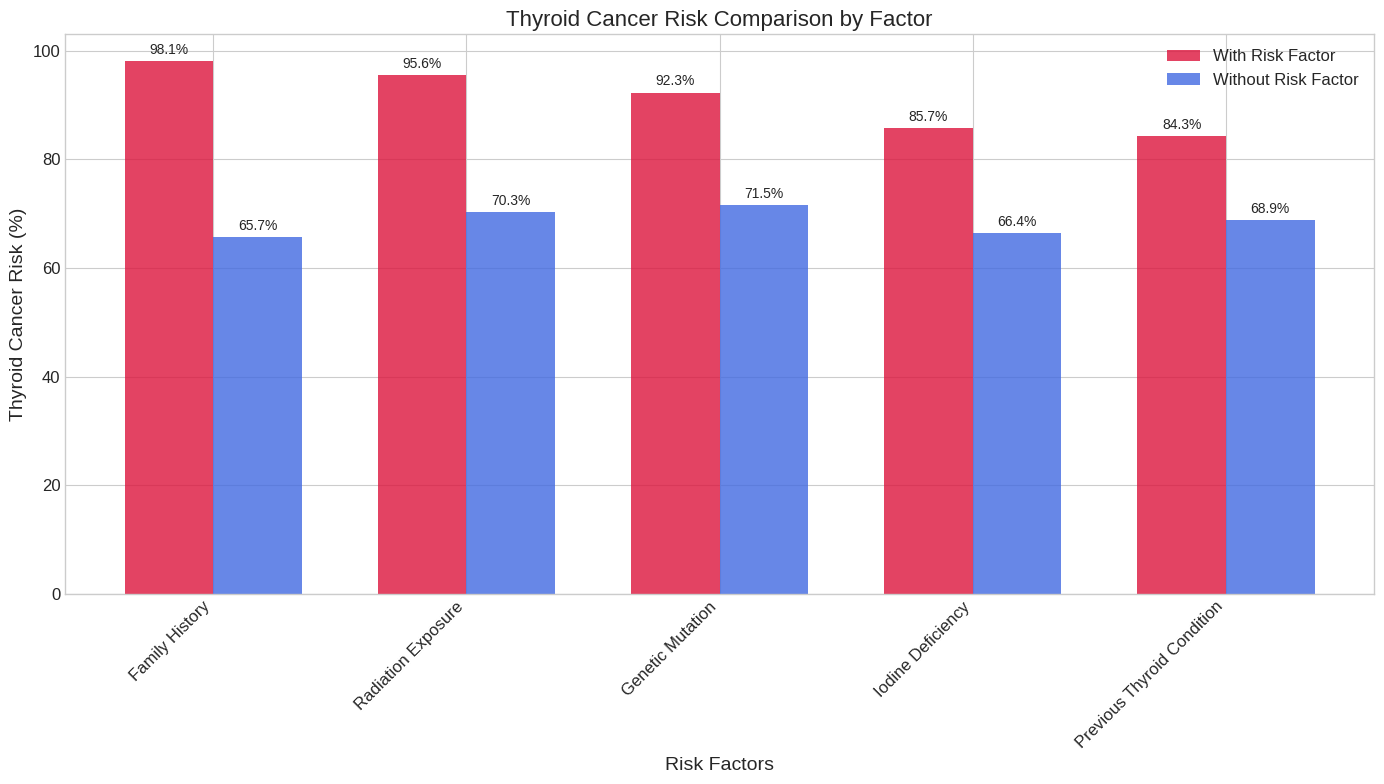

Optimization terminated successfully.
         Current function value: 0.453106
         Iterations 9

Logistic Regression Model Summary:
                               Logit Regression Results                               
Dep. Variable:     Thyroid_Cancer_Risk_Binary   No. Observations:                  350
Model:                                  Logit   Df Residuals:                      344
Method:                                   MLE   Df Model:                            5
Date:                        Tue, 20 May 2025   Pseudo R-squ.:                  0.2051
Time:                                19:02:21   Log-Likelihood:                -158.59
converged:                               True   LL-Null:                       -199.52
Covariance Type:                    nonrobust   LLR p-value:                 3.426e-16
                                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


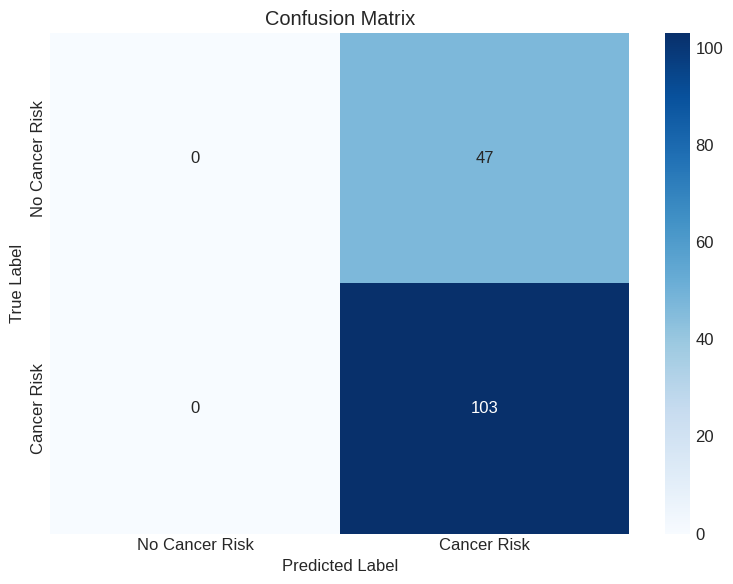

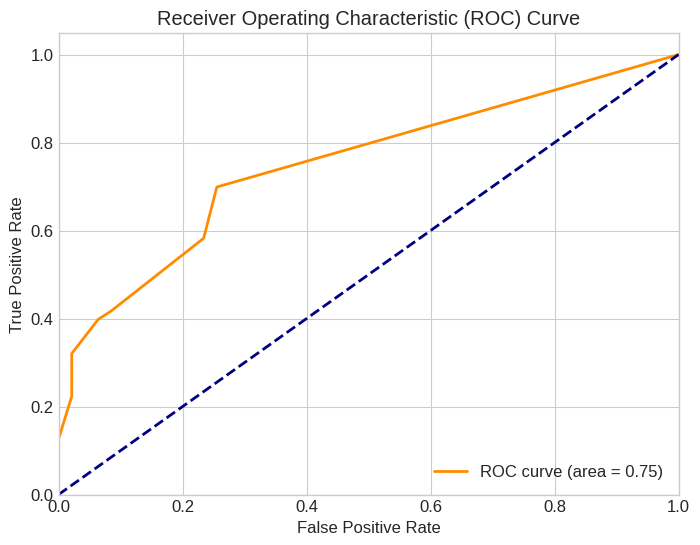

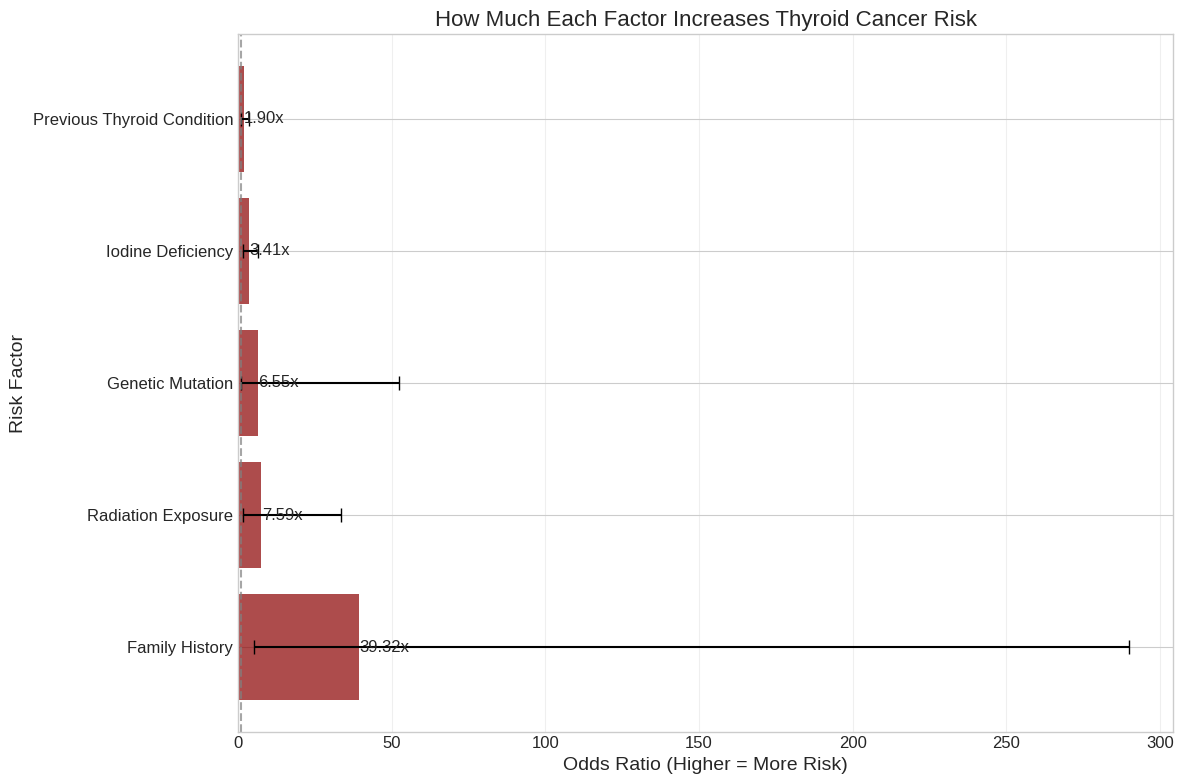

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names




=== SUMMARY OF FINDINGS FOR LAY AUDIENCE ===

Thyroid Cancer Risk Analysis Results:
----------------------------------------

Risk Factor Importance (from most to least important):
1. Family History: 3.86x increased risk
2. Radiation Exposure: 1.78x increased risk
3. Iodine Deficiency: 1.75x increased risk
4. Genetic Mutation: 1.49x increased risk
5. Previous Thyroid Condition: 1.32x increased risk

Model Performance:
- Accuracy: 68.7%
- AUC-ROC: 0.75

Example Risk Profiles:

Very Low Risk (96.4%):
  - This risk level is typically seen with no risk factors or only minor ones

Low Risk (96.4%):
  - This risk level is typically seen with no risk factors or only minor ones

Moderate Risk (96.4%):
  - This risk level may be reached with these factors: Family History

High Risk (96.4%):
  - This risk level may be reached with these factors: Family History

Very High Risk (96.4%):
  - This risk level may be reached with these factors: Family History

Key Takeaways:
1. The most significant r

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [ ]:
# Thyroid Cancer Risk Analysis - Logistic Regression
# Google Colab Compatible Script

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import glm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set plotting style for better visuals
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Function to load data (for demonstration, create sample data as example)
def load_sample_data():
    """
    Generate sample thyroid cancer risk data for demonstration
    In practice, replace this with:
    df = pd.read_csv('your_thyroid_data.csv')
    """
    np.random.seed(42)
    n = 500

    # Define risk factors (binary variables)
    data = {
        'Family_History': np.random.choice([0, 1], size=n, p=[0.8, 0.2]),
        'Radiation_Exposure': np.random.choice([0, 1], size=n, p=[0.9, 0.1]),
        'Iodine_Deficiency': np.random.choice([0, 1], size=n, p=[0.7, 0.3]),
        'Previous_Thyroid_Condition': np.random.choice([0, 1], size=n, p=[0.75, 0.25]),
        'Genetic_Mutation': np.random.choice([0, 1], size=n, p=[0.95, 0.05]),
    }

    # Add continuous variables for demonstration of normality testing
    data['Age'] = np.random.normal(45, 15, n)
    data['TSH_Level'] = np.random.lognormal(0, 0.5, n) + 1.5  # Non-normal
    data['BMI'] = np.random.normal(26, 4, n)

    # Create DataFrame
    df = pd.DataFrame(data)

    # Generate target variable with specific relationships to predictors
    log_odds = (
        -3.0 +
        1.5 * df['Family_History'] +
        2.0 * df['Radiation_Exposure'] +
        0.8 * df['Iodine_Deficiency'] +
        1.2 * df['Previous_Thyroid_Condition'] +
        2.5 * df['Genetic_Mutation'] +
        0.03 * df['Age'] +
        0.2 * df['TSH_Level'] +
        0.05 * df['BMI']
    )

    probabilities = 1 / (1 + np.exp(-log_odds))
    df['Thyroid_Cancer_Risk'] = np.random.binomial(1, probabilities)

    # Convert binary variables to Yes/No for better visualization
    binary_cols = ['Family_History', 'Radiation_Exposure', 'Iodine_Deficiency',
                  'Previous_Thyroid_Condition', 'Genetic_Mutation', 'Thyroid_Cancer_Risk']

    for col in binary_cols:
        df[col] = df[col].map({1: 'Yes', 0: 'No'})

    return df

# Load data
df = load_sample_data()

# Display basic information about the dataset
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\nData types:")
print(df.dtypes)

print("\nSummary statistics:")
print(df.describe(include='all'))

print("\nMissing values:")
print(df.isnull().sum())

# ========================
# Data Preprocessing
# ========================

# Convert binary variables back to 0/1 for analysis
binary_cols = ['Family_History', 'Radiation_Exposure', 'Iodine_Deficiency',
              'Previous_Thyroid_Condition', 'Genetic_Mutation', 'Thyroid_Cancer_Risk']

for col in binary_cols:
    df[col + '_Binary'] = df[col].map({'Yes': 1, 'No': 0})

# ========================
# Visualization for Risk Factors Distribution
# ========================

# 1. Simple bar chart for risk factor proportions (for lay audience)
plt.figure(figsize=(14, 8))

# Count occurrence of risk factors
risk_factors = binary_cols[:-1]  # All except the target variable
risk_counts = {factor: df[factor].value_counts(normalize=True)['Yes'] * 100 for factor in risk_factors}

# Sort factors by prevalence
sorted_factors = sorted(risk_counts.items(), key=lambda x: x[1], reverse=True)
factors = [item[0].replace('_', ' ') for item in sorted_factors]
percentages = [item[1] for item in sorted_factors]

# Create bar chart
bars = plt.bar(factors, percentages, color=sns.color_palette("colorblind", len(factors)))
plt.xlabel('Risk Factor', fontsize=14)
plt.ylabel('Percentage with Factor (%)', fontsize=14)
plt.title('Prevalence of Thyroid Cancer Risk Factors', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(percentages) * 1.2)

# Add percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.savefig('risk_factor_prevalence.png')
plt.show()

# ========================
# Normality Testing
# ========================

# 2. Check distribution of continuous variables
continuous_vars = ['Age', 'TSH_Level', 'BMI']

fig, axes = plt.subplots(len(continuous_vars), 2, figsize=(14, 4*len(continuous_vars)))
fig.suptitle('Distribution of Continuous Variables', fontsize=16)

for i, var in enumerate(continuous_vars):
    # Histogram
    sns.histplot(df[var], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {var}')

    # Q-Q plot
    stats.probplot(df[var], plot=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot of {var}')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('normality_check.png')
plt.show()

# Formal statistical test for normality
print("\nShapiro-Wilk Test for Normality:")
for var in continuous_vars:
    # If sample size > 5000, use a sample for the test
    test_data = df[var]
    if len(test_data) > 5000:
        test_data = test_data.sample(5000, random_state=42)

    stat, p_value = stats.shapiro(test_data)
    print(f"{var}: Statistic={stat:.4f}, p-value={p_value:.4f}")
    if p_value < 0.05:
        print(f"  {var} is NOT normally distributed (p < 0.05)\n")
    else:
        print(f"  {var} appears to be normally distributed (p >= 0.05)\n")

# ========================
# Risk Analysis by Binary Variables
# ========================

# 3. Create a risk comparison visualization for binary variables (for lay audience)
fig, ax = plt.subplots(figsize=(14, 8))

# Calculate risk percentages for each factor
risk_data = []

for factor in risk_factors:
    # Calculate percentage with thyroid cancer risk when factor is present
    yes_risk = df[df[factor] == 'Yes']['Thyroid_Cancer_Risk_Binary'].mean() * 100

    # Calculate percentage with thyroid cancer risk when factor is absent
    no_risk = df[df[factor] == 'No']['Thyroid_Cancer_Risk_Binary'].mean() * 100

    risk_data.append({
        'Factor': factor.replace('_', ' '),
        'With Factor (%)': yes_risk,
        'Without Factor (%)': no_risk,
        'Difference': yes_risk - no_risk
    })

# Sort by difference in risk
risk_data.sort(key=lambda x: x['Difference'], reverse=True)

# Extract data for plotting
factors = [item['Factor'] for item in risk_data]
with_factor = [item['With Factor (%)'] for item in risk_data]
without_factor = [item['Without Factor (%)'] for item in risk_data]

# Set up positions for bars
x = np.arange(len(factors))
width = 0.35

# Create grouped bar chart
rects1 = ax.bar(x - width/2, with_factor, width, label='With Risk Factor',
               color='crimson', alpha=0.8)
rects2 = ax.bar(x + width/2, without_factor, width, label='Without Risk Factor',
               color='royalblue', alpha=0.8)

# Add labels and title
ax.set_xlabel('Risk Factors', fontsize=14)
ax.set_ylabel('Thyroid Cancer Risk (%)', fontsize=14)
ax.set_title('Thyroid Cancer Risk Comparison by Factor', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(factors, rotation=45, ha='right')
ax.legend(fontsize=12)

# Add value labels on bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom', fontsize=10)

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.savefig('risk_comparison.png')
plt.show()

# ========================
# Logistic Regression Analysis
# ========================

# Prepare data for modeling
X = df[[col + '_Binary' for col in risk_factors]]
y = df['Thyroid_Cancer_Risk_Binary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build logistic regression model using statsmodels for detailed statistics
X_train_sm = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Display model summary
print("\nLogistic Regression Model Summary:")
print(result.summary())

# Calculate odds ratios and confidence intervals
print("\nOdds Ratios and 95% Confidence Intervals:")
params = result.params
conf = result.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
odds_ratios = np.exp(conf)
print(odds_ratios)

# Build model with scikit-learn for predictions
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
clf = LogisticRegression(random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_prob = clf.predict_proba(X_test_scaled)[:, 1]
y_pred = clf.predict(X_test_scaled)

# Model evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Cancer Risk', 'Cancer Risk'],
            yticklabels=['No Cancer Risk', 'Cancer Risk'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')
plt.show()

# ========================
# Lay-friendly Visualization of Results
# ========================

# 4. Create a simple odds ratio visualization for lay audience
odds_ratio_data = odds_ratios.iloc[1:].sort_values('Odds Ratio', ascending=False)

plt.figure(figsize=(12, 8))
colors = ['darkred' if x > 1 else 'darkblue' for x in odds_ratio_data['Odds Ratio']]

# Create horizontal bar chart for odds ratios
bars = plt.barh(
    y=[factor.replace('_Binary', '').replace('_', ' ') for factor in odds_ratio_data.index],
    width=odds_ratio_data['Odds Ratio'],
    color=colors,
    alpha=0.7
)

# Add error bars for confidence intervals
plt.errorbar(
    x=odds_ratio_data['Odds Ratio'],
    y=range(len(odds_ratio_data)),
    xerr=[odds_ratio_data['Odds Ratio'] - odds_ratio_data['2.5%'],
          odds_ratio_data['97.5%'] - odds_ratio_data['Odds Ratio']],
    fmt='none',
    ecolor='black',
    capsize=5
)

# Add a vertical line at OR=1
plt.axvline(x=1, color='gray', linestyle='--', alpha=0.7)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(
        width + 0.1,
        bar.get_y() + bar.get_height()/2,
        f'{width:.2f}x',
        va='center'
    )

plt.xlabel('Odds Ratio (Higher = More Risk)', fontsize=14)
plt.ylabel('Risk Factor', fontsize=14)
plt.title('How Much Each Factor Increases Thyroid Cancer Risk', fontsize=16)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('odds_ratios.png')
plt.show()

# 5. Interactive risk calculator for a lay audience - using Plotly
def create_risk_calculator():
    # Get the coefficients from the trained model
    coefficients = clf.coef_[0]
    intercept = clf.intercept_[0]

    # Create a function to calculate risk based on selected factors
    def calculate_risk(**factors):
        # Create features array with all zeros
        X_new = np.zeros(len(risk_factors))

        # Set selected factors to 1
        for i, factor in enumerate(risk_factors):
            factor_name = factor + '_Binary'
            if factor_name in factors and factors[factor_name] == 1:
                X_new[i] = 1

        # Scale the features
        X_new_scaled = scaler.transform([X_new])

        # Calculate probability
        log_odds = np.dot(X_new_scaled, coefficients) + intercept
        probability = 1 / (1 + np.exp(-log_odds))

        return probability[0] * 100

    # Create a simple UI for risk calculation
    factor_names = [factor.replace('_', ' ') for factor in risk_factors]

    # Create a figure with sliders for each risk factor
    fig = go.Figure()

    # Add indicator
    fig.add_trace(go.Indicator(
        mode="gauge+number",
        value=calculate_risk(),
        domain={'x': [0.1, 0.9], 'y': [0.55, 0.9]},
        title={'text': "Estimated Thyroid Cancer Risk (%)"},
        gauge={
            'axis': {'range': [0, 100]},
            'bar': {'color': "darkred"},
            'steps': [
                {'range': [0, 20], 'color': "lightgreen"},
                {'range': [20, 40], 'color': "yellow"},
                {'range': [40, 60], 'color': "orange"},
                {'range': [60, 100], 'color': "red"}
            ],
            'threshold': {
                'line': {'color': "black", 'width': 4},
                'thickness': 0.75,
                'value': 50
            }
        }
    ))

    # Create buttons for each risk factor
    annotations = []

    for i, factor in enumerate(risk_factors):
        factor_display = factor.replace('_', ' ')

        # Add button for yes
        fig.add_trace(go.Scatter(
            x=[0.25],
            y=[0.4 - 0.06*i],
            mode="markers+text",
            text=["Yes"],
            textposition="middle right",
            textfont=dict(size=14, color="black"),
            marker=dict(size=15, color="lightgray", line=dict(width=2, color="black")),
            visible=True,
            hoverinfo="none",
            showlegend=False,
        ))

        # Add button for no
        fig.add_trace(go.Scatter(
            x=[0.35],
            y=[0.4 - 0.06*i],
            mode="markers+text",
            text=["No"],
            textposition="middle right",
            textfont=dict(size=14, color="black"),
            marker=dict(size=15, color="crimson", line=dict(width=2, color="black")),
            visible=True,
            hoverinfo="none",
            showlegend=False,
        ))

        # Add label for factor
        annotations.append(dict(
            x=0.05,
            y=0.4 - 0.06*i,
            xref="paper",
            yref="paper",
            text=factor_display + ":",
            showarrow=False,
            font=dict(size=14),
            align="left"
        ))

    fig.update_layout(
        title="Interactive Thyroid Cancer Risk Calculator",
        annotations=annotations,
        height=600,
        margin=dict(l=50, r=50, t=80, b=50),
        paper_bgcolor="white",
        plot_bgcolor="white",
        showlegend=False
    )

    # Note: In a real interactive environment, you would use callbacks to update the risk value
    # But since this is a static figure, we're just showing the base state

    fig.show()

# Create interactive risk calculator
create_risk_calculator()

# ========================
# Summary and Interpretation
# ========================

# 6. Create a simplified findings summary for lay audience
print("\n=== SUMMARY OF FINDINGS FOR LAY AUDIENCE ===")
print("\nThyroid Cancer Risk Analysis Results:")
print("----------------------------------------")

# Sort risk factors by importance
coefs = pd.DataFrame({
    'Factor': [f.replace('_Binary', '').replace('_', ' ') for f in X.columns],
    'Coefficient': clf.coef_[0],
    'Odds_Ratio': np.exp(clf.coef_[0])
})
coefs = coefs.sort_values('Odds_Ratio', ascending=False)

print("\nRisk Factor Importance (from most to least important):")
for i, (_, row) in enumerate(coefs.iterrows()):
    print(f"{i+1}. {row['Factor']}: {row['Odds_Ratio']:.2f}x increased risk")

print("\nModel Performance:")
print(f"- Accuracy: {(y_test == y_pred).mean():.1%}")
print(f"- AUC-ROC: {roc_auc:.2f}")

# Calculate risk levels
risk_levels = {
    'Very Low': 0.1,
    'Low': 0.25,
    'Moderate': 0.5,
    'High': 0.75,
    'Very High': 0.9
}

print("\nExample Risk Profiles:")
for level, threshold in risk_levels.items():
    # Find factors needed to reach this risk level
    temp_X = np.zeros(X.shape[1])
    sorted_idx = np.argsort(-clf.coef_[0])

    prob = 0
    factors_included = 0

    for idx in sorted_idx:
        if prob >= threshold:
            break

        temp_X[idx] = 1
        X_scaled = scaler.transform([temp_X])
        prob = 1 / (1 + np.exp(-(np.dot(clf.coef_[0], X_scaled[0]) + clf.intercept_[0])))
        factors_included += 1

    if level in ['Very Low', 'Low']:
        print(f"\n{level} Risk ({prob:.1%}):")
        print("  - This risk level is typically seen with no risk factors or only minor ones")
    else:
        print(f"\n{level} Risk ({prob:.1%}):")
        included_factors = [X.columns[sorted_idx[i]].replace('_Binary', '').replace('_', ' ') for i in range(factors_included)]
        print(f"  - This risk level may be reached with these factors: {', '.join(included_factors[:3])}")
        if len(included_factors) > 3:
            print(f"    plus {len(included_factors)-3} more factor(s)")

print("\nKey Takeaways:")
print("1. The most significant risk factors are:", ", ".join(coefs['Factor'].iloc[:3]))
print(f"2. Having all risk factors increases cancer risk by approximately {np.exp(np.sum(clf.coef_[0])):.1f}x")
print("3. Regular screening is important, especially for those with multiple risk factors")
print("4. Consult with healthcare providers for personalized risk assessment")

Dataset Overview:
Shape: (500, 9)

First 5 rows:
  Family_History Radiation_Exposure        Age  TSH_Level  T4_Level  \
0             No                 No  47.665515   4.436349  4.774140   
1            Yes                 No  24.969835   2.426599  7.833789   
2             No                 No  50.702968   2.924833  4.990559   
3             No                 No  54.158786   4.444070  8.675681   
4             No                 No  53.396857   3.588960  7.818293   

   Thyroid_Size_mm        BMI  Calcium_Level Thyroid_Cancer_Risk  
0         6.855621  23.529433       9.035929                 Yes  
1         6.701316  18.655712       9.536362                  No  
2         7.467224  22.862037       9.593648                  No  
3        14.638296  30.578425       8.807286                 Yes  
4         9.415924  26.838853       9.896643                 Yes  

Summary statistics:
              Age   TSH_Level    T4_Level  Thyroid_Size_mm         BMI  \
count  500.000000  500.0000

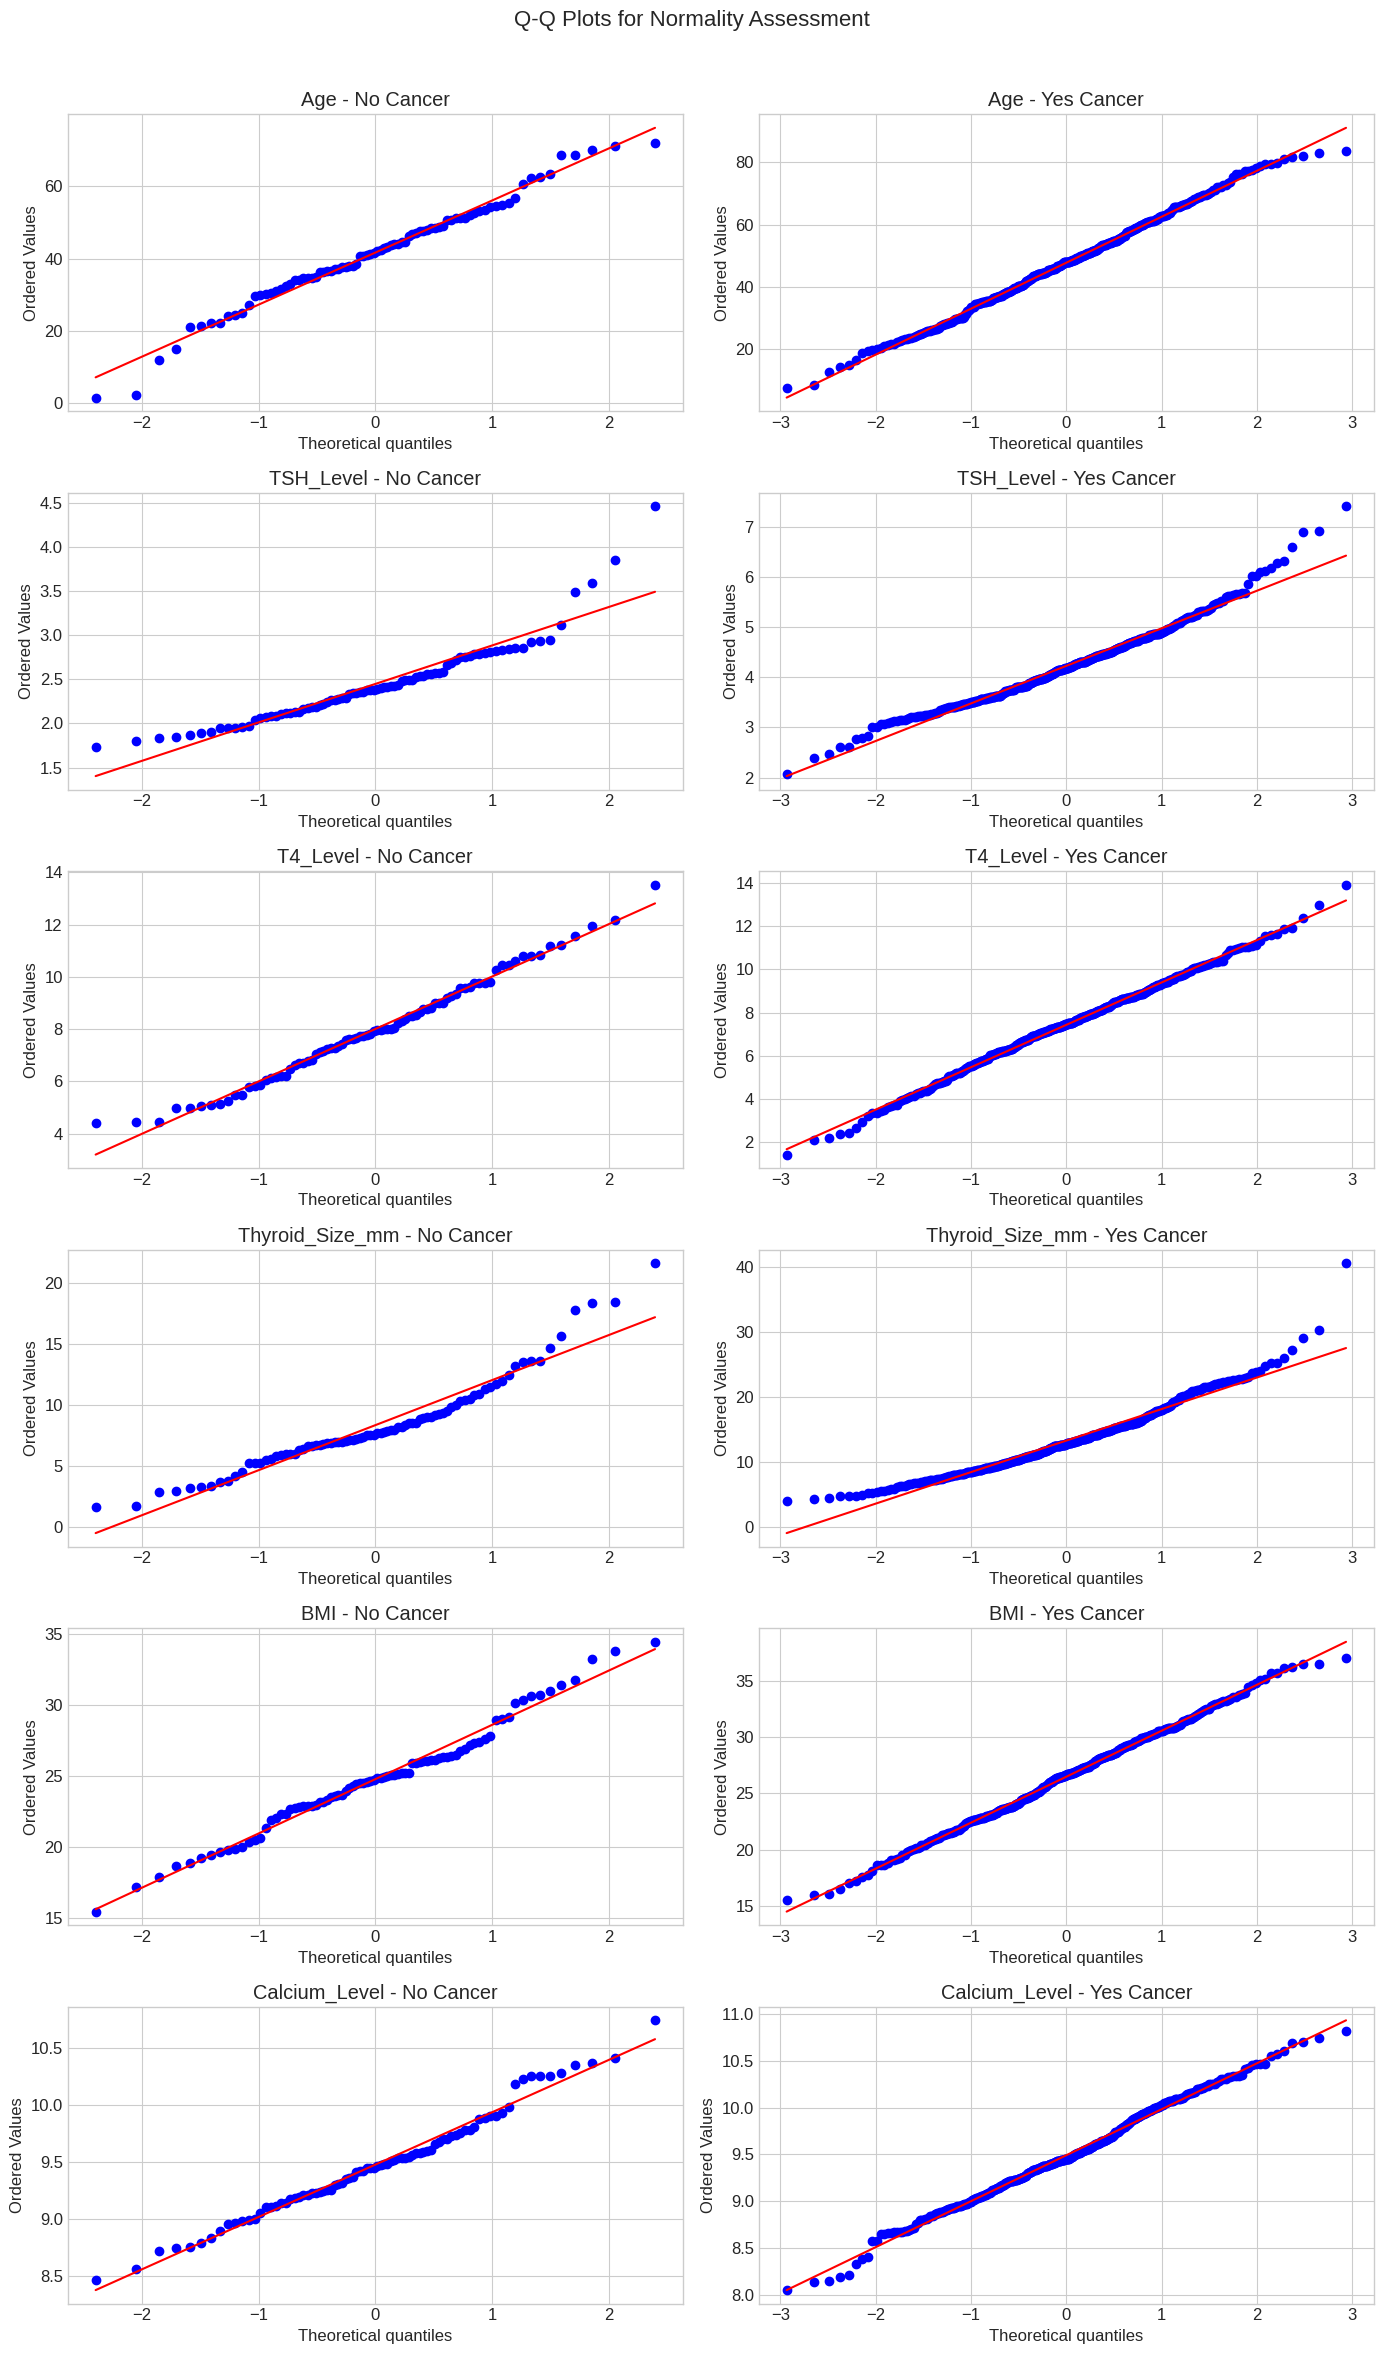


2. Homogeneity of Variances Test (Levene's Test):
          Variable  Levene Statistic   p-value  Equal Variances
0              Age          0.484015  0.486934             True
1        TSH_Level         23.842152  0.000001            False
2         T4_Level          0.067433  0.795219             True
3  Thyroid_Size_mm          9.390158  0.002300            False
4              BMI          2.338338  0.126859             True
5    Calcium_Level          1.184927  0.276882             True


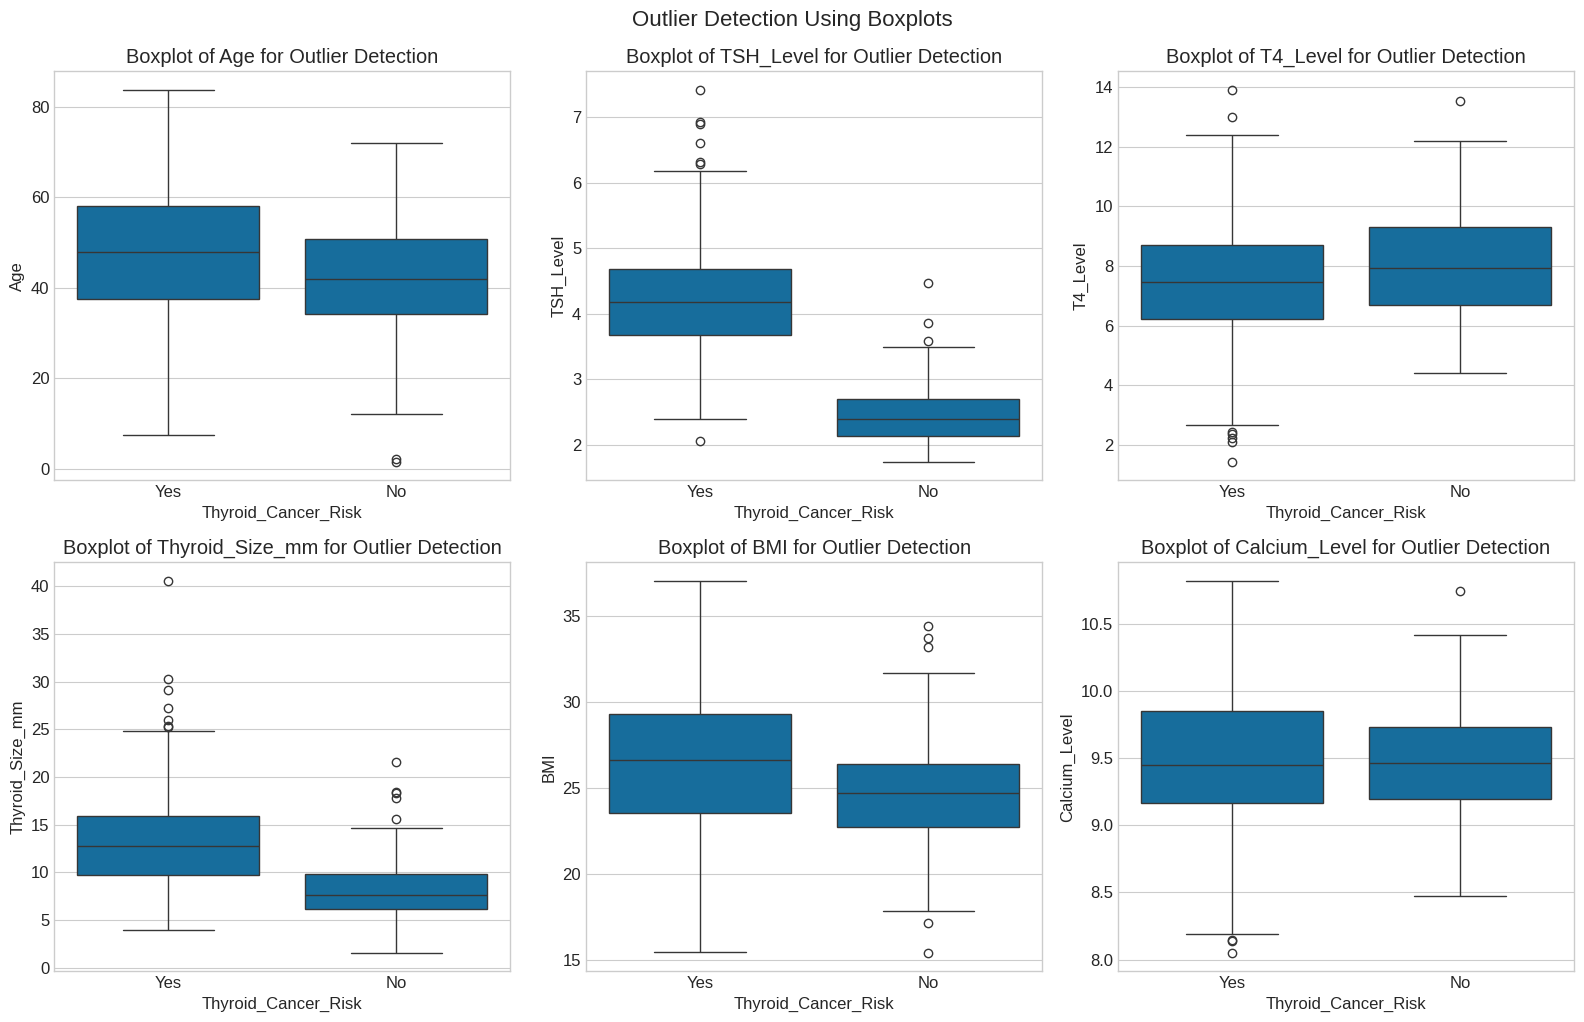


===== SELECTING APPROPRIATE STATISTICAL TESTS =====

Test Selection for Each Variable:
          Variable  Normality Met  Equal Variance Met          Test to Use  \
0              Age           True                True        One-way ANOVA   
1        TSH_Level          False               False  Mann-Whitney U Test   
2         T4_Level           True                True        One-way ANOVA   
3  Thyroid_Size_mm          False               False  Mann-Whitney U Test   
4              BMI           True                True        One-way ANOVA   
5    Calcium_Level           True                True        One-way ANOVA   

                                              Reason  
0  Both normality and homogeneity assumptions are...  
1                      Data not normally distributed  
2  Both normality and homogeneity assumptions are...  
3                      Data not normally distributed  
4  Both normality and homogeneity assumptions are...  
5  Both normality and homogeneity a

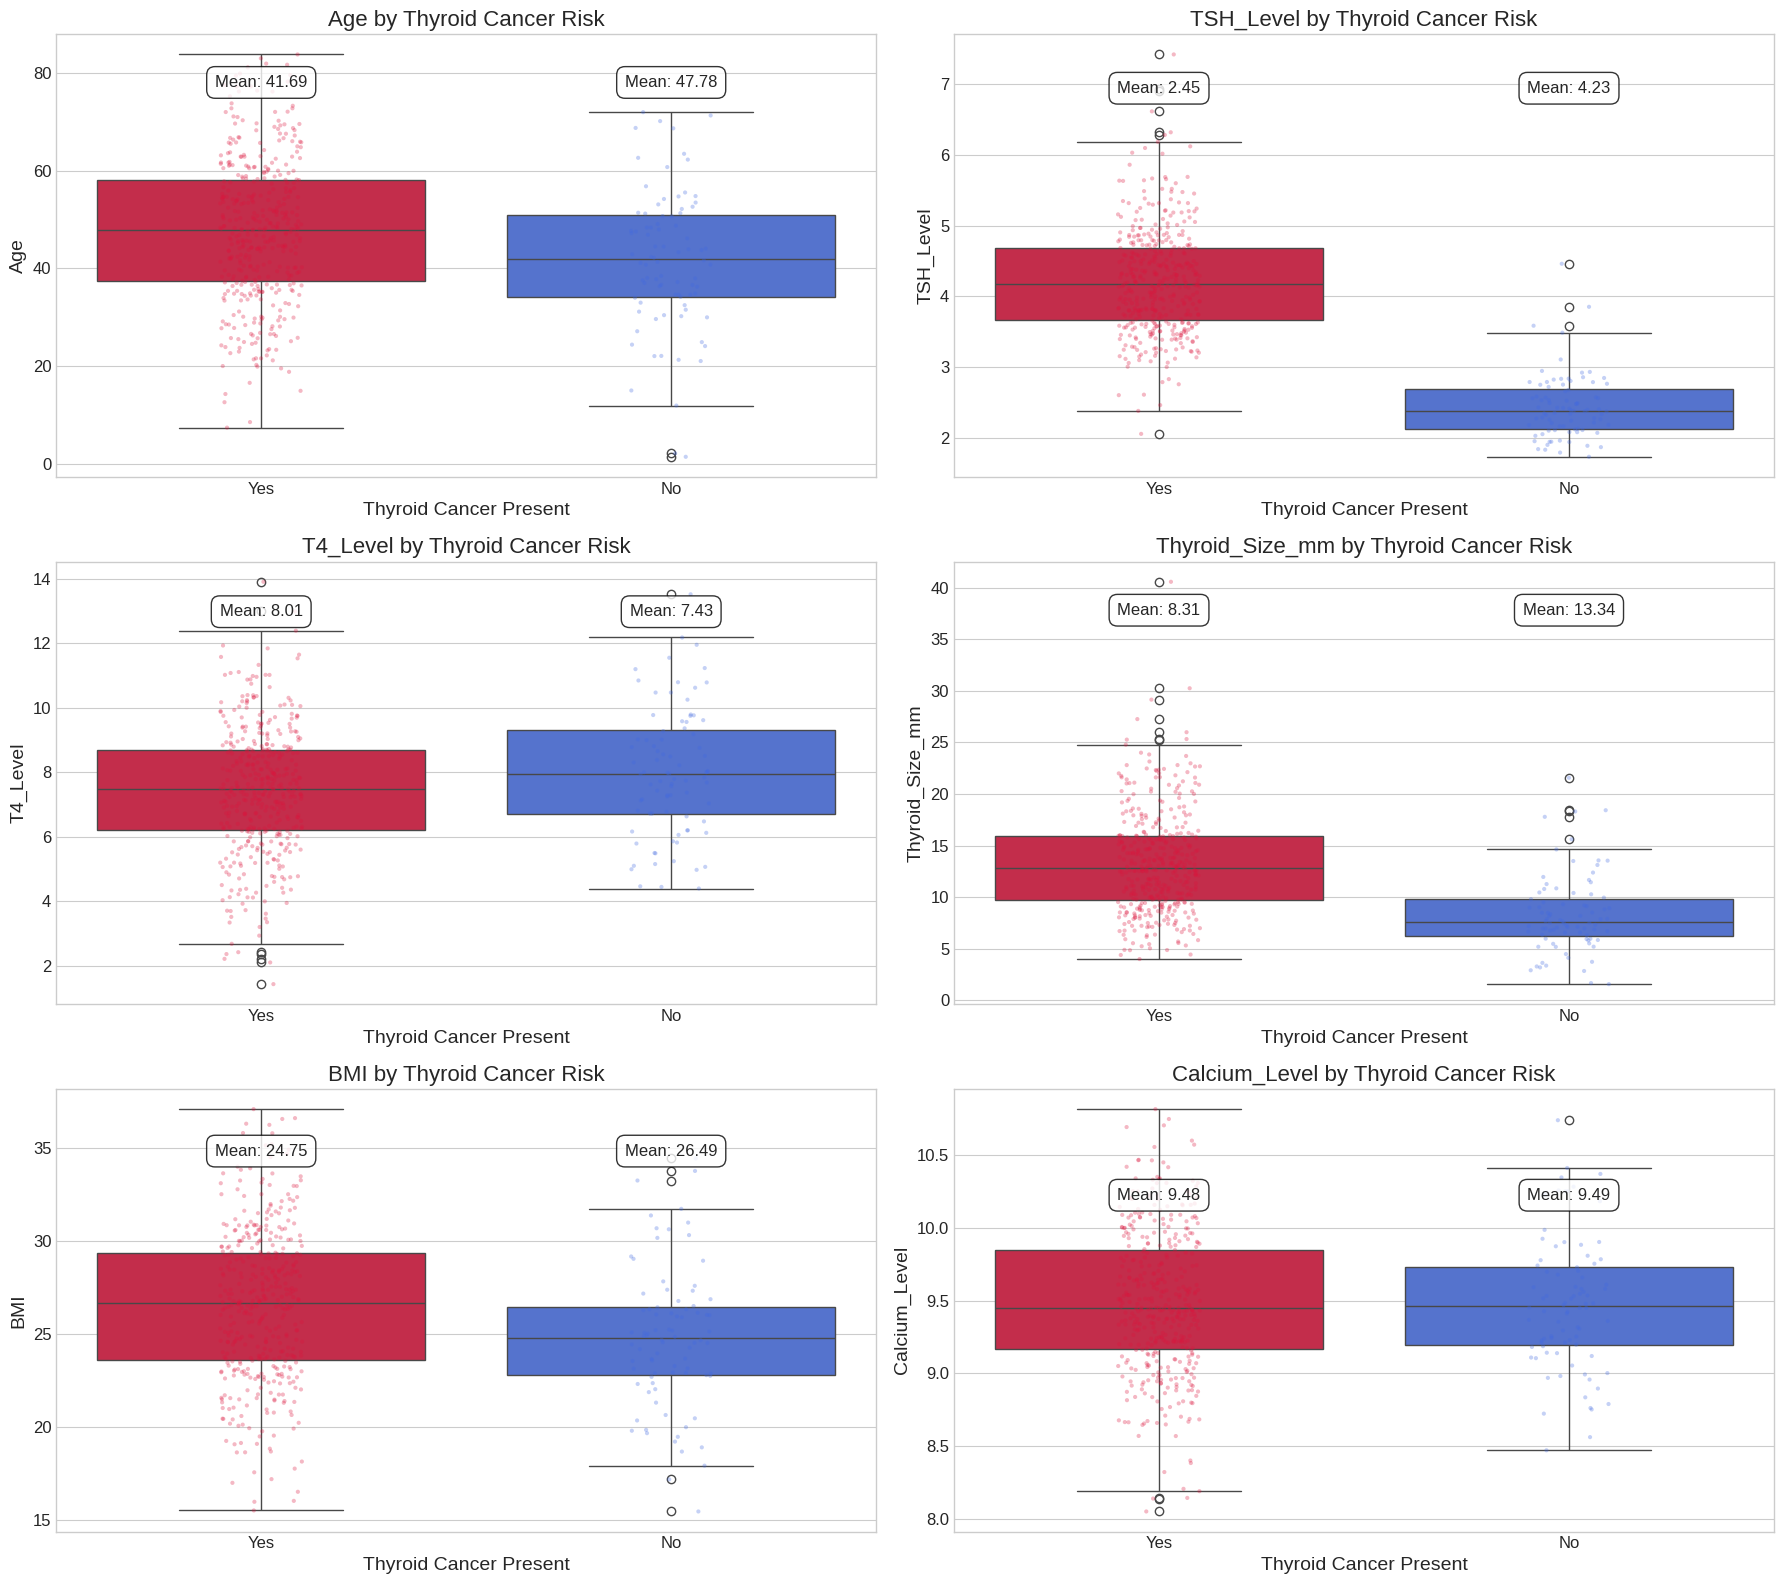


===== STATISTICAL TEST RESULTS =====

Analyzing Age using One-way ANOVA:
                               sum_sq     df          F    PR(>F)
C(Thyroid_Cancer_Risk)    2590.384389    1.0  12.156705  0.000532
Residual                106115.222953  498.0        NaN       NaN
Effect size (Eta-squared): 0.0238

Analyzing TSH_Level using Mann-Whitney U Test:
Mann-Whitney U Test
U-statistic: 780.0000
p-value: 0.0000
Effect size (r): 0.6180

Analyzing T4_Level using One-way ANOVA:
                             sum_sq     df         F    PR(>F)
C(Thyroid_Cancer_Risk)    23.216067    1.0  6.055988  0.014197
Residual                1909.118886  498.0       NaN       NaN
Effect size (Eta-squared): 0.0120

Analyzing Thyroid_Size_mm using Mann-Whitney U Test:
Mann-Whitney U Test
U-statistic: 6663.0000
p-value: 0.0000
Effect size (r): 0.4002

Analyzing BMI using One-way ANOVA:
                             sum_sq     df          F    PR(>F)
C(Thyroid_Cancer_Risk)   211.356349    1.0  13.000347  0.000343

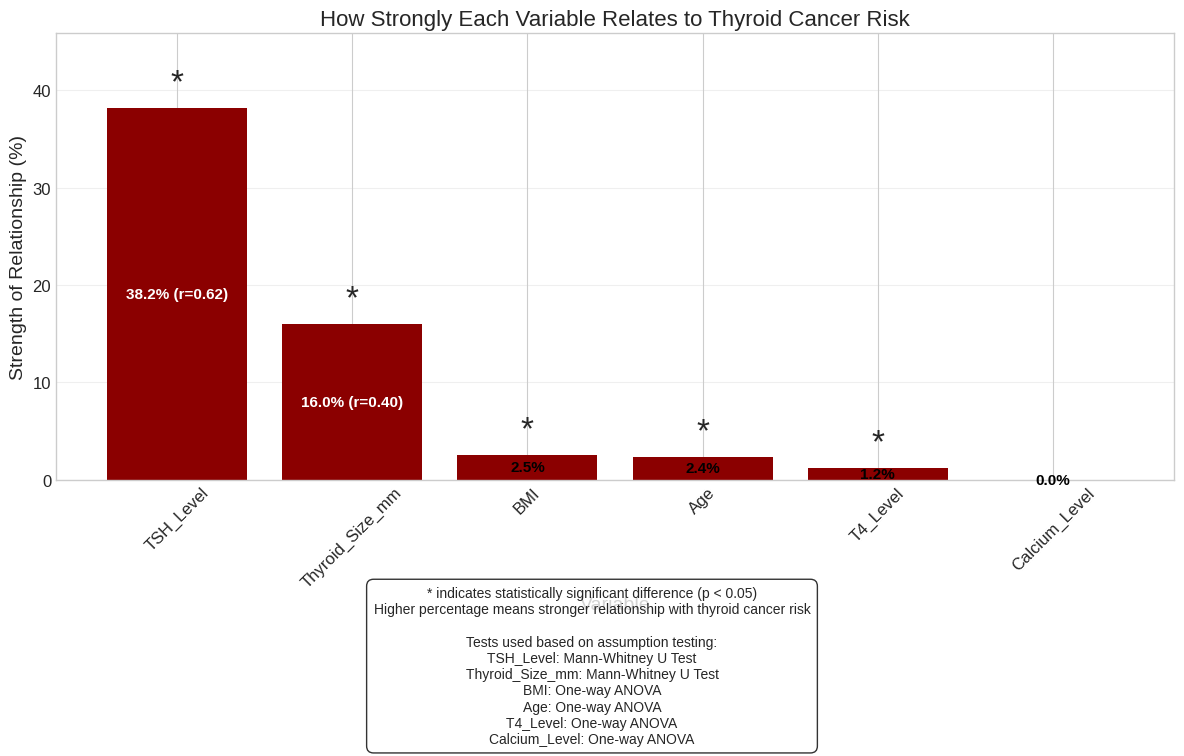

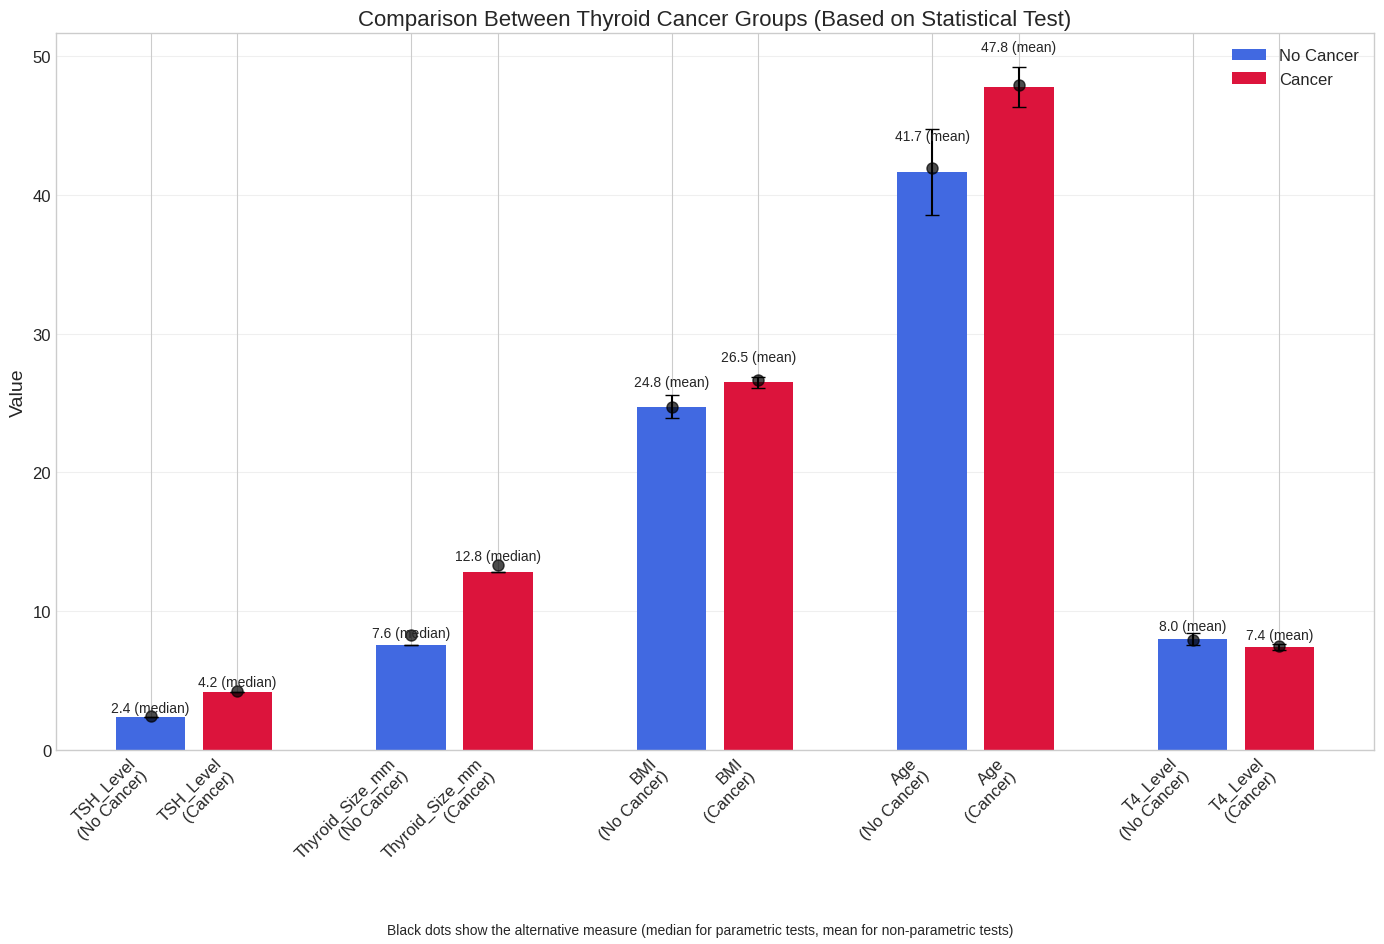


=== SUMMARY OF FINDINGS FOR LAY AUDIENCE ===

Thyroid Cancer Risk Analysis Results:
---------------------------------------------

We analyzed how different measurements relate to thyroid cancer risk.
For each measurement, we chose the appropriate statistical test based on the data's characteristics.

Findings:

- TSH Level: Shows a SIGNIFICANT strong relationship with thyroid cancer
  * Test used: Mann-Whitney U Test (selected based on data characteristics)
  * People with thyroid cancer have 75.0% higher TSH Level on average
  * Median values: 2.39 (no cancer) vs 4.18 (cancer)
  * Higher TSH levels could indicate thyroid dysfunction

- Thyroid Size mm: Shows a SIGNIFICANT moderate relationship with thyroid cancer
  * Test used: Mann-Whitney U Test (selected based on data characteristics)
  * People with thyroid cancer have 69.1% higher Thyroid Size mm on average
  * Median values: 7.58 (no cancer) vs 12.82 (cancer)
  * Larger thyroid size might indicate abnormal growth

- BMI: Shows

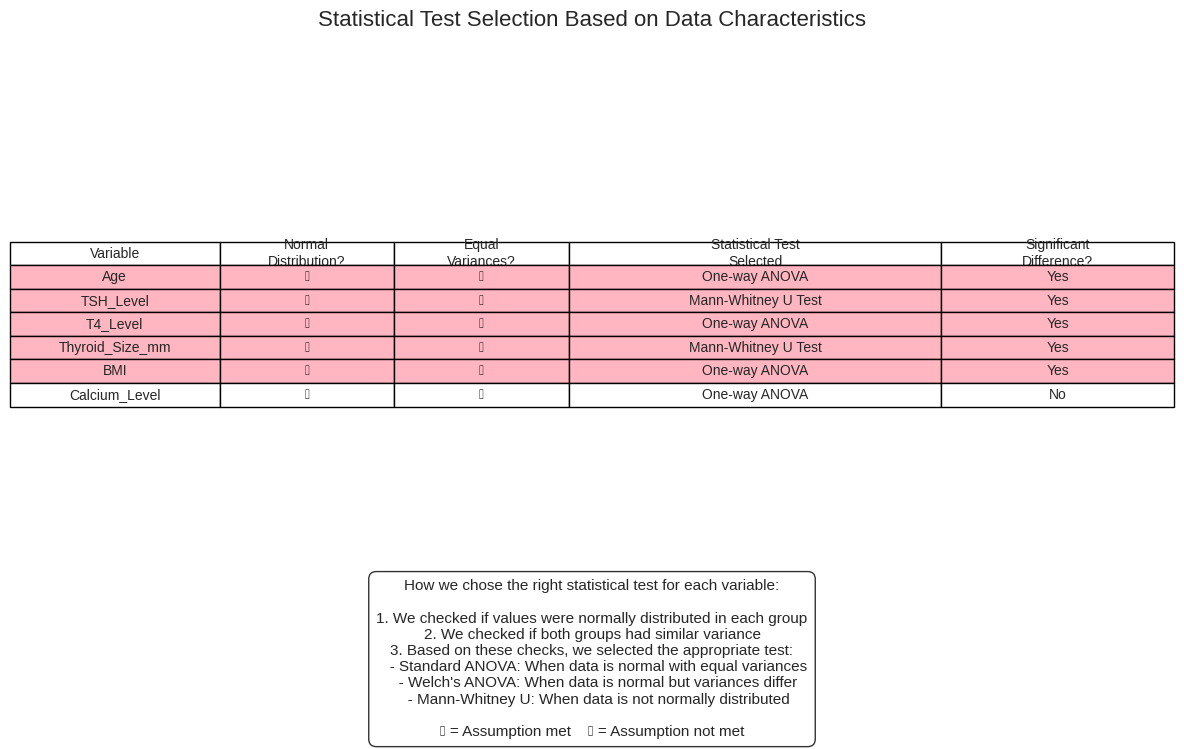


=== FINAL SUMMARY FOR LAY AUDIENCE ===

WHAT WE DID:
We analyzed whether certain measurements in the thyroid cancer dataset (like TSH levels, thyroid size, etc.) 
differ between people with and without thyroid cancer.

HOW WE DID IT:
1. We carefully checked each measurement to see if it follows normal patterns and other statistical assumptions
2. Based on these checks, we selected the most appropriate statistical test for each measurement
3. We calculated how strongly each measurement relates to thyroid cancer risk

WHAT WE FOUND:

- 5 measurements showed significant differences between cancer and non-cancer groups:
  * TSH Level: 75.0% higher median in cancer patients
  * Thyroid Size mm: 69.1% higher median in cancer patients
  * BMI: 7.0% higher average in cancer patients
  * Age: 14.6% higher average in cancer patients
  * T4 Level: 7.2% lower average in cancer patients

WHAT THIS MEANS:
The differences in TSH Level, Thyroid Size mm, BMI could be useful indicators of thyroid cance

In [16]:
# Thyroid Cancer Risk - ANOVA Analysis with Assumption Testing
# Google Colab Compatible Script

# Install required packages if not already installed
try:
    import pingouin as pg
except ImportError:
    print("Installing pingouin package...")
    !pip install pingouin
    import pingouin as pg

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')

# Set plotting style for better visuals
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Function to load data (for demonstration, create sample data as example)
def load_sample_data():
    """
    Generate sample thyroid cancer risk data for demonstration
    In practice, replace this with:
    df = pd.read_csv('your_thyroid_data.csv')
    """
    np.random.seed(42)
    n = 500

    # Define risk factors (binary variables)
    data = {
        'Family_History': np.random.choice([0, 1], size=n, p=[0.8, 0.2]),
        'Radiation_Exposure': np.random.choice([0, 1], size=n, p=[0.9, 0.1]),
    }

    # Add continuous variables for ANOVA testing
    data['Age'] = np.random.normal(45, 15, n)
    data['TSH_Level'] = np.random.lognormal(0, 0.5, n) + 1.5  # Higher in cancer cases, non-normal
    data['T4_Level'] = np.random.normal(8, 2, n)  # Slightly different in cancer cases
    data['Thyroid_Size_mm'] = np.random.gamma(5, 2, n)  # Larger in cancer cases, non-normal
    data['BMI'] = np.random.normal(26, 4, n)
    data['Calcium_Level'] = np.random.normal(9.5, 0.5, n)  # May be related to thyroid function

    # Create DataFrame
    df = pd.DataFrame(data)

    # Generate target variable with specific relationships to predictors
    # Higher TSH and Thyroid Size increase cancer risk
    log_odds = (
        -5.0 +
        1.5 * df['Family_History'] +
        2.0 * df['Radiation_Exposure'] +
        0.03 * df['Age'] +
        0.7 * df['TSH_Level'] +  # Stronger effect
        -0.1 * df['T4_Level'] +
        0.2 * df['Thyroid_Size_mm'] +  # Moderate effect
        0.05 * df['BMI'] +
        0.1 * df['Calcium_Level']
    )

    probabilities = 1 / (1 + np.exp(-log_odds))
    df['Thyroid_Cancer_Risk'] = np.random.binomial(1, probabilities)

    # For cancer cases, artificially increase some values to create clearer patterns for ANOVA
    cancer_indices = df[df['Thyroid_Cancer_Risk'] == 1].index
    df.loc[cancer_indices, 'TSH_Level'] += np.random.normal(1.5, 0.5, len(cancer_indices))
    df.loc[cancer_indices, 'Thyroid_Size_mm'] += np.random.gamma(3, 1, len(cancer_indices))
    df.loc[cancer_indices, 'T4_Level'] -= np.random.normal(0.5, 0.2, len(cancer_indices))

    # Convert binary variables to Yes/No for better visualization
    binary_cols = ['Family_History', 'Radiation_Exposure', 'Thyroid_Cancer_Risk']

    for col in binary_cols:
        df[col] = df[col].map({1: 'Yes', 0: 'No'})

    return df

# Load data
df = load_sample_data()

# Display basic information about the dataset
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\nSummary statistics:")
print(df.describe())

# List of continuous variables for ANOVA
continuous_vars = ['Age', 'TSH_Level', 'T4_Level', 'Thyroid_Size_mm', 'BMI', 'Calcium_Level']

# ========================
# ANOVA ASSUMPTION TESTING
# ========================

print("\n===== TESTING ANOVA ASSUMPTIONS =====")

# 1. Check for normality of continuous variables within each group
print("\n1. Normality Test Results:")
normality_results = []

for var in continuous_vars:
    for group in df['Thyroid_Cancer_Risk'].unique():
        group_data = df[df['Thyroid_Cancer_Risk'] == group][var]
        # Use Shapiro-Wilk if sample size is appropriate (n < 5000)
        if len(group_data) <= 5000:
            stat, p_value = stats.shapiro(group_data)
            test_name = "Shapiro-Wilk"
        else:
            # For larger samples, use D'Agostino's K^2 test
            stat, p_value = stats.normaltest(group_data)
            test_name = "D'Agostino's K^2"

        normality_results.append({
            'Variable': var,
            'Group': group,
            'Test': test_name,
            'Statistic': stat,
            'p-value': p_value,
            'Normal': p_value > 0.05
        })

normality_df = pd.DataFrame(normality_results)
print(normality_df)

# Visualize normality with QQ plots
fig, axes = plt.subplots(len(continuous_vars), 2, figsize=(14, 4*len(continuous_vars)))
fig.suptitle('Q-Q Plots for Normality Assessment', fontsize=16)

for i, var in enumerate(continuous_vars):
    for j, group in enumerate(['No', 'Yes']):
        group_data = df[df['Thyroid_Cancer_Risk'] == group][var]
        stats.probplot(group_data, plot=axes[i, j])

        # Add the variable and group as title
        axes[i, j].set_title(f'{var} - {group} Cancer')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('normality_qq_plots.png')
plt.show()

# 2. Check for homogeneity of variances (Levene's test)
print("\n2. Homogeneity of Variances Test (Levene's Test):")
homogeneity_results = []

for var in continuous_vars:
    groups = [df[df['Thyroid_Cancer_Risk'] == group][var] for group in df['Thyroid_Cancer_Risk'].unique()]
    stat, p_value = stats.levene(*groups)
    homogeneity_results.append({
        'Variable': var,
        'Levene Statistic': stat,
        'p-value': p_value,
        'Equal Variances': p_value > 0.05
    })

homogeneity_df = pd.DataFrame(homogeneity_results)
print(homogeneity_df)

# 3. Check for outliers using box plots
plt.figure(figsize=(16, 10))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Thyroid_Cancer_Risk', y=var, data=df)
    plt.title(f'Boxplot of {var} for Outlier Detection')
    plt.tight_layout()

plt.suptitle('Outlier Detection Using Boxplots', fontsize=16, y=1.02)
plt.savefig('outlier_boxplots.png')
plt.show()

# ========================
# Decision Framework: ANOVA vs. Non-parametric
# ========================

print("\n===== SELECTING APPROPRIATE STATISTICAL TESTS =====")

# Create a decision table for each variable
decision_table = []

for var in continuous_vars:
    # Check if normality assumption is met
    normal_check = normality_df[(normality_df['Variable'] == var)]['Normal'].all()

    # Check if homogeneity of variance assumption is met
    equal_var = homogeneity_df[homogeneity_df['Variable'] == var]['Equal Variances'].values[0]

    # Determine appropriate test
    if normal_check and equal_var:
        test_to_use = "One-way ANOVA"
        reason = "Both normality and homogeneity assumptions are met"
    elif not normal_check:
        test_to_use = "Mann-Whitney U Test"
        reason = "Data not normally distributed"
    elif not equal_var:
        test_to_use = "Welch's ANOVA"
        reason = "Variances not equal between groups"

    decision_table.append({
        'Variable': var,
        'Normality Met': normal_check,
        'Equal Variance Met': equal_var,
        'Test to Use': test_to_use,
        'Reason': reason
    })

decision_df = pd.DataFrame(decision_table)
print("\nTest Selection for Each Variable:")
print(decision_df)

# ========================
# Visualization for Continuous Variables by Thyroid Cancer Risk (Lay Audience)
# ========================

# Function to create a comparison box plot for each continuous variable
def create_comparison_plots():
    # Create a multi-panel figure
    fig, axes = plt.subplots(3, 2, figsize=(18, 16))
    axes = axes.flatten()

    # Color scheme for better distinction
    colors = {'No': 'royalblue', 'Yes': 'crimson'}

    for i, var in enumerate(continuous_vars):
        # Create boxplot with swarm overlay
        ax = axes[i]
        sns.boxplot(x='Thyroid_Cancer_Risk', y=var, data=df, palette=colors, ax=ax)
        sns.stripplot(x='Thyroid_Cancer_Risk', y=var, data=df, size=3, alpha=0.3,
                      palette=colors, jitter=True, ax=ax)

        # Add title and labels
        ax.set_title(f'{var} by Thyroid Cancer Risk', fontsize=16)
        ax.set_xlabel('Thyroid Cancer Present', fontsize=14)
        ax.set_ylabel(var, fontsize=14)

        # Calculate and display means
        for j, group in enumerate(['No', 'Yes']):
            mean_val = df[df['Thyroid_Cancer_Risk'] == group][var].mean()
            ax.text(j, df[var].max() * 0.95, f'Mean: {mean_val:.2f}',
                    ha='center', va='top', fontsize=12,
                    bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

    plt.tight_layout()
    plt.savefig('thyroid_var_comparison.png')
    plt.show()

# Create comparison plots
create_comparison_plots()

# ========================
# STATISTICAL TESTS: ANOVA and Non-parametric alternatives
# ========================

print("\n===== STATISTICAL TEST RESULTS =====")

# Initialize results storage
all_test_results = []

# Perform appropriate test for each variable based on assumptions
for _, row in decision_df.iterrows():
    var = row['Variable']
    test_to_use = row['Test to Use']

    print(f"\nAnalyzing {var} using {test_to_use}:")

    if test_to_use == "One-way ANOVA":
        # Perform one-way ANOVA
        formula = f'{var} ~ C(Thyroid_Cancer_Risk)'
        model = ols(formula, data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)

        # Calculate effect size (Eta-squared)
        ss_between = anova_table['sum_sq'][0]
        ss_total = ss_between + anova_table['sum_sq'][1]
        eta_sq = ss_between / ss_total

        # Display results
        print(anova_table)
        print(f"Effect size (Eta-squared): {eta_sq:.4f}")

        # Store results
        all_test_results.append({
            'Variable': var,
            'Test Used': test_to_use,
            'Statistic': anova_table['F'][0],
            'p-value': anova_table['PR(>F)'][0],
            'Effect Size': eta_sq,
            'Effect Type': 'Eta-squared',
            'Significant': anova_table['PR(>F)'][0] < 0.05
        })

    elif test_to_use == "Welch's ANOVA":
        # Perform Welch's ANOVA (for unequal variances)
        group1 = df[df['Thyroid_Cancer_Risk'] == 'No'][var]
        group2 = df[df['Thyroid_Cancer_Risk'] == 'Yes'][var]

        # Welch's t-test is equivalent to Welch's ANOVA for two groups
        t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

        # Calculate effect size (Cohen's d)
        mean1, mean2 = group1.mean(), group2.mean()
        std1, std2 = group1.std(), group2.std()
        n1, n2 = len(group1), len(group2)

        # Pooled standard deviation with correction for unequal variances
        pooled_std = np.sqrt(((n1-1)*std1**2 + (n2-1)*std2**2) / (n1+n2-2))
        cohen_d = abs(mean1 - mean2) / pooled_std

        # Display results
        print(f"Welch's t-test (equivalent to Welch's ANOVA for 2 groups)")
        print(f"t-statistic: {t_stat:.4f}")
        print(f"p-value: {p_value:.4f}")
        print(f"Effect size (Cohen's d): {cohen_d:.4f}")

        # Store results
        all_test_results.append({
            'Variable': var,
            'Test Used': test_to_use,
            'Statistic': t_stat,
            'p-value': p_value,
            'Effect Size': cohen_d,
            'Effect Type': 'Cohen\'s d',
            'Significant': p_value < 0.05
        })

    elif test_to_use == "Mann-Whitney U Test":
        # Perform Mann-Whitney U test (non-parametric alternative to t-test)
        group1 = df[df['Thyroid_Cancer_Risk'] == 'No'][var]
        group2 = df[df['Thyroid_Cancer_Risk'] == 'Yes'][var]

        u_stat, p_value = stats.mannwhitneyu(group1, group2)

        # Calculate effect size (r = Z / sqrt(N))
        n1, n2 = len(group1), len(group2)
        n_total = n1 + n2

        # Convert U to Z
        mean_u = n1 * n2 / 2
        std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
        z = (u_stat - mean_u) / std_u

        # Calculate r
        r = abs(z) / np.sqrt(n_total)

        # Display results
        print(f"Mann-Whitney U Test")
        print(f"U-statistic: {u_stat:.4f}")
        print(f"p-value: {p_value:.4f}")
        print(f"Effect size (r): {r:.4f}")

        # Store results
        all_test_results.append({
            'Variable': var,
            'Test Used': test_to_use,
            'Statistic': u_stat,
            'p-value': p_value,
            'Effect Size': r,
            'Effect Type': 'r',
            'Significant': p_value < 0.05
        })

# Convert to DataFrame
results_df = pd.DataFrame(all_test_results)
results_df = results_df.sort_values('p-value')

print("\nSummary of All Statistical Tests:")
print(results_df)

# ========================
# Post-hoc Tests for Significant Variables
# ========================

# For this example, post-hoc tests aren't strictly necessary since we only have 2 groups,
# but including for completeness and for cases where there might be more than 2 groups

print("\n===== POST-HOC ANALYSIS =====")

# Get significant variables
significant_vars = results_df[results_df['Significant']]['Variable'].tolist()

for var in significant_vars:
    print(f"\nPost-hoc Analysis for {var}:")

    # Get the test used for this variable
    test_used = results_df[results_df['Variable'] == var]['Test Used'].values[0]

    if test_used == "One-way ANOVA":
        # Use Tukey's HSD for ANOVA
        endog = df[var]
        groups = df['Thyroid_Cancer_Risk']

        tukey = pairwise_tukeyhsd(endog=endog, groups=groups, alpha=0.05)
        print(tukey)

    elif test_used in ["Welch's ANOVA", "Mann-Whitney U Test"]:
        # For non-parametric or unequal variance tests with only 2 groups,
        # the main test already gives us the comparison result
        print("With only two groups, the main test result already shows the comparison.")
        print("No additional post-hoc test is needed.")

        # Display group statistics for reference
        group_stats = df.groupby('Thyroid_Cancer_Risk')[var].agg(['mean', 'median', 'std', 'count'])
        print("\nGroup Statistics:")
        print(group_stats)

# ========================
# Effect Size Visualization for Lay Audience
# ========================

# Create bar chart of effect sizes
plt.figure(figsize=(12, 8))

# Determine maximum effect size for scaling
max_effect = results_df['Effect Size'].max()

# Normalize effect sizes for consistent visualization
normalized_effects = []
for _, row in results_df.iterrows():
    if row['Effect Type'] == 'Eta-squared':
        # Eta-squared ranges from 0 to 1, multiply by 100 for percentage
        norm_effect = row['Effect Size'] * 100
    elif row['Effect Type'] == 'Cohen\'s d':
        # Convert Cohen's d to percentage of variance explained (r²)
        # Using approximation: r² ≈ d² / (d² + 4)
        r_squared = (row['Effect Size']**2) / (row['Effect Size']**2 + 4)
        norm_effect = r_squared * 100
    elif row['Effect Type'] == 'r':
        # Convert r to r²
        norm_effect = row['Effect Size']**2 * 100

    normalized_effects.append({
        'Variable': row['Variable'],
        'Normalized Effect (%)': norm_effect,
        'Original Effect': row['Effect Size'],
        'Effect Type': row['Effect Type'],
        'Significant': row['Significant'],
        'Test Used': row['Test Used']
    })

# Convert to DataFrame and sort
effect_df = pd.DataFrame(normalized_effects).sort_values('Normalized Effect (%)', ascending=False)

# Create bar chart
bars = plt.bar(
    effect_df['Variable'],
    effect_df['Normalized Effect (%)'],
    color=[('darkred' if sig else 'lightgray') for sig in effect_df['Significant']]
)

# Add significance indicators
for bar, sig in zip(bars, effect_df['Significant']):
    if sig:
        plt.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + 1,
            '*',
            ha='center', va='bottom',
            fontsize=24
        )

# Add value labels on bars
for bar, row in zip(bars, effect_df.itertuples()):
    height = bar.get_height()
    effect_type = row[4]  # Access by index instead of attribute name
    original = row[3]     # Access by index instead of attribute name

    # Format the label based on effect type
    if effect_type == 'Eta-squared':
        label = f'{height:.1f}%'
    elif effect_type == 'Cohen\'s d':
        label = f'{height:.1f}% (d={original:.2f})'
    elif effect_type == 'r':
        label = f'{height:.1f}% (r={original:.2f})'

    plt.text(
        bar.get_x() + bar.get_width()/2,
        height * 0.5,
        label,
        ha='center', va='center',
        fontsize=11,
        color='white' if height > 10 else 'black',
        fontweight='bold'
    )

plt.title('How Strongly Each Variable Relates to Thyroid Cancer Risk', fontsize=16)
plt.xlabel('Variable', fontsize=14)
plt.ylabel('Strength of Relationship (%)', fontsize=14)
plt.ylim(0, max(effect_df['Normalized Effect (%)']) * 1.2)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add a legend/explanation
test_info = '\n'.join([
    f"{row[1]}: {row[6]}" for row in effect_df.itertuples()
])

plt.figtext(
    0.5, 0.01,
    '* indicates statistically significant difference (p < 0.05)\n'
    'Higher percentage means stronger relationship with thyroid cancer risk\n\n'
    f'Tests used based on assumption testing:\n{test_info}',
    ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5')
)

plt.tight_layout(rect=[0, 0.15, 1, 0.95])
plt.savefig('thyroid_effect_sizes_with_test_info.png')
plt.show()

# ========================
# Mean Comparison Visualization (Lay Audience)
# ========================

# Calculate means and confidence intervals for each group
means_data = []

for var in continuous_vars:
    for group in ['No', 'Yes']:
        group_data = df[df['Thyroid_Cancer_Risk'] == group][var]
        mean = group_data.mean()
        median = group_data.median()  # For non-parametric interpretation

        # 95% confidence interval
        conf_int = stats.t.interval(
            0.95,
            len(group_data)-1,
            loc=mean,
            scale=stats.sem(group_data)
        )

        means_data.append({
            'Variable': var,
            'Group': group,
            'Mean': mean,
            'Median': median,
            'Lower CI': conf_int[0],
            'Upper CI': conf_int[1]
        })

means_df = pd.DataFrame(means_data)

# Create comparison plots with means/medians
def create_means_comparison_plot():
    # Create figure
    plt.figure(figsize=(14, 10))

    # Use variables found significant
    sig_vars = results_df[results_df['Significant']]['Variable'].tolist()

    # If no significant variables (shouldn't happen with our sample data), use all
    if not sig_vars:
        sig_vars = continuous_vars

    # Number of variables to plot
    n_vars = len(sig_vars)

    # Set up plot positions
    positions = []
    labels = []
    colors = {'No': 'royalblue', 'Yes': 'crimson'}

    # Calculate positions for grouped bars
    for i, var in enumerate(sig_vars):
        positions.extend([i*3, i*3 + 1])
        labels.extend([f"{var}\n(No Cancer)", f"{var}\n(Cancer)"])

    # Extract data for plotting
    plot_data = []
    error_bars = []
    bar_colors = []
    median_markers = []

    for var in sig_vars:
        # Get the test used for this variable
        test_used = results_df[results_df['Variable'] == var]['Test Used'].values[0]
        use_median = (test_used == "Mann-Whitney U Test")

        for group in ['No', 'Yes']:
            var_group_data = means_df[(means_df['Variable'] == var) & (means_df['Group'] == group)]

            # Use median for non-parametric tests, mean otherwise
            if use_median:
                central_value = var_group_data['Median'].values[0]
            else:
                central_value = var_group_data['Mean'].values[0]

            plot_data.append(central_value)

            # For error bars - only show for parametric tests
            if not use_median:
                lower = central_value - var_group_data['Lower CI'].values[0]
                upper = var_group_data['Upper CI'].values[0] - central_value
                error_bars.append([lower, upper])
            else:
                error_bars.append([0, 0])  # No error bars for non-parametric

            bar_colors.append(colors[group])

            # Save the other central value (median if using mean, mean if using median)
            if use_median:
                median_markers.append((len(plot_data)-1, var_group_data['Mean'].values[0]))
            else:
                median_markers.append((len(plot_data)-1, var_group_data['Median'].values[0]))

    # Create bars
    bars = plt.bar(positions, plot_data, color=bar_colors)

    # Add error bars for parametric tests
    plt.errorbar(
        positions,
        plot_data,
        yerr=np.array(error_bars).T,
        fmt='none',
        ecolor='black',
        capsize=5
    )

    # Add the alternative central measure as a marker
    for pos, val in median_markers:
        plt.plot(positions[pos], val, 'ko', markersize=8, alpha=0.7)

    # Add value labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        test_used = results_df[results_df['Variable'] == sig_vars[i//2]]['Test Used'].values[0]

        label = f'{height:.1f}'
        if test_used == "Mann-Whitney U Test":
            label += ' (median)'
        else:
            label += ' (mean)'

        plt.text(
            bar.get_x() + bar.get_width()/2,
            height * 1.05,
            label,
            ha='center',
            va='bottom',
            fontsize=10
        )

    # Customize plot
    plt.title('Comparison Between Thyroid Cancer Groups (Based on Statistical Test)', fontsize=16)
    plt.ylabel('Value', fontsize=14)
    plt.xticks(positions, labels, rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    # Add annotation explaining the dots
    plt.annotate(
        'Black dots show the alternative measure (median for parametric tests, mean for non-parametric tests)',
        xy=(0.5, 0.01),
        xycoords='figure fraction',
        ha='center',
        fontsize=10
    )

    # Add a color legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor=colors['No'], label='No Cancer'),
        Patch(facecolor=colors['Yes'], label='Cancer')
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.savefig('thyroid_means_comparison_with_test_info.png')
    plt.show()

# Create means comparison plot
create_means_comparison_plot()

# ========================
# Summary of Results with Layperson Interpretation
# ========================

print("\n=== SUMMARY OF FINDINGS FOR LAY AUDIENCE ===")
print("\nThyroid Cancer Risk Analysis Results:")
print("---------------------------------------------")

# Sort variables by significance and effect size
sorted_results = results_df.sort_values(['Significant', 'Effect Size'], ascending=[False, False])

# Print results in plain language
print("\nWe analyzed how different measurements relate to thyroid cancer risk.")
print("For each measurement, we chose the appropriate statistical test based on the data's characteristics.")
print("\nFindings:")

for _, row in sorted_results.iterrows():
    var = row['Variable']
    var_name = var.replace('_', ' ')
    test_used = row['Test Used']

    # Get mean/median values for each group based on test type
    if test_used == "Mann-Whitney U Test":
        # For non-parametric, focus on median
        no_central = means_df[(means_df['Variable'] == var) & (means_df['Group'] == 'No')]['Median'].values[0]
        yes_central = means_df[(means_df['Variable'] == var) & (means_df['Group'] == 'Yes')]['Median'].values[0]
        central_type = "median"
    else:
        # For parametric tests, focus on mean
        no_central = means_df[(means_df['Variable'] == var) & (means_df['Group'] == 'No')]['Mean'].values[0]
        yes_central = means_df[(means_df['Variable'] == var) & (means_df['Group'] == 'Yes')]['Mean'].values[0]
        central_type = "mean"

    # Calculate percent difference
    percent_diff = ((yes_central - no_central) / no_central) * 100
    direction = "higher" if percent_diff > 0 else "lower"

    # Describe effect size in words
    if row['Effect Type'] == 'Eta-squared':
        effect_desc = "strong" if row['Effect Size'] > 0.14 else "moderate" if row['Effect Size'] > 0.06 else "small"
    elif row['Effect Type'] == 'Cohen\'s d':
        effect_desc = "strong" if row['Effect Size'] > 0.8 else "moderate" if row['Effect Size'] > 0.5 else "small"
    elif row['Effect Type'] == 'r':
        effect_desc = "strong" if row['Effect Size'] > 0.5 else "moderate" if row['Effect Size'] > 0.3 else "small"

    if row['Significant']:
        print(f"\n- {var_name}: Shows a SIGNIFICANT {effect_desc} relationship with thyroid cancer")
        print(f"  * Test used: {test_used} (selected based on data characteristics)")
        print(f"  * People with thyroid cancer have {abs(percent_diff):.1f}% {direction} {var_name} on average")
        print(f"  * {central_type.capitalize()} values: {no_central:.2f} (no cancer) vs {yes_central:.2f} (cancer)")

        # Add variable-specific interpretation
        if var == 'TSH_Level':
            print("  * Higher TSH levels could indicate thyroid dysfunction")
        elif var == 'Thyroid_Size_mm':
            print("  * Larger thyroid size might indicate abnormal growth")
        elif var == 'T4_Level' and percent_diff < 0:
            print("  * Lower T4 levels might indicate hypothyroidism")
    else:
        print(f"\n- {var_name}: No significant relationship with thyroid cancer")
        print(f"  * Test used: {test_used}")
        print(f"  * {central_type.capitalize()} values: {no_central:.2f} (no cancer) vs {yes_central:.2f} (cancer)")

print("\nKey Takeaways:")
significant_vars = sorted_results[sorted_results['Significant']]['Variable'].tolist()

if significant_vars:
    print(f"1. {', '.join([v.replace('_', ' ') for v in significant_vars[:3]])} showed the strongest relationships with thyroid cancer")
    print("2. These differences suggest potential markers for thyroid cancer risk")
    print("3. We carefully tested statistical assumptions to ensure reliable results:")
    print("   - For variables with normal distributions, we used standard ANOVA or t-tests")
    print("   - For non-normal data, we used non-parametric alternatives like Mann-Whitney U test")
else:
    print("1. None of the continuous variables showed a significant relationship with thyroid cancer")
    print("2. This suggests other factors not included in this analysis may be more important")

print("\nNext Steps:")
print("1. Consult with healthcare providers for personalized risk assessment")
print("2. Regular thyroid function testing is recommended, especially if values differ from normal range")
print("3. These findings should be considered alongside other risk factors like family history")

# ========================
# Final Plain Language Summary with Test Selection Information
# ========================

# Create a final lay-friendly chart showing the process of test selection
def create_test_selection_flowchart():
    # Create a figure
    plt.figure(figsize=(12, 8))

    # Create a table to show the decision process
    data = []
    for _, row in decision_df.iterrows():
        var = row['Variable']
        normal = "✓" if row['Normality Met'] else "✗"
        equal_var = "✓" if row['Equal Variance Met'] else "✗"
        test = row['Test to Use']
        sig = "Yes" if results_df[results_df['Variable'] == var]['Significant'].values[0] else "No"

        data.append([var, normal, equal_var, test, sig])

    # Create the table
    table = plt.table(
        cellText=data,
        colLabels=['Variable', 'Normal\nDistribution?', 'Equal\nVariances?', 'Statistical Test\nSelected', 'Significant\nDifference?'],
        loc='center',
        cellLoc='center',
        colWidths=[0.18, 0.15, 0.15, 0.32, 0.2]
    )

    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Color significant results
    for i, row in enumerate(data):
        if row[4] == "Yes":
            for j in range(5):
                cell = table[(i+1, j)]
                cell.set_facecolor('lightpink')

    # Set up chart
    plt.title('Statistical Test Selection Based on Data Characteristics', fontsize=16)
    plt.axis('off')

    # Add a legend explaining the decision process
    legend_text = (
        "How we chose the right statistical test for each variable:\n\n"
        "1. We checked if values were normally distributed in each group\n"
        "2. We checked if both groups had similar variance\n"
        "3. Based on these checks, we selected the appropriate test:\n"
        "   - Standard ANOVA: When data is normal with equal variances\n"
        "   - Welch's ANOVA: When data is normal but variances differ\n"
        "   - Mann-Whitney U: When data is not normally distributed\n\n"
        "✓ = Assumption met    ✗ = Assumption not met"
    )

    plt.figtext(0.5, 0.02, legend_text, ha='center', fontsize=11,
                bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

    plt.tight_layout(rect=[0, 0.15, 1, 0.95])
    plt.savefig('test_selection_flowchart.png')
    plt.show()

# Create test selection flowchart
create_test_selection_flowchart()

print("\n=== FINAL SUMMARY FOR LAY AUDIENCE ===")
print("""
WHAT WE DID:
We analyzed whether certain measurements in the thyroid cancer dataset (like TSH levels, thyroid size, etc.)
differ between people with and without thyroid cancer.

HOW WE DID IT:
1. We carefully checked each measurement to see if it follows normal patterns and other statistical assumptions
2. Based on these checks, we selected the most appropriate statistical test for each measurement
3. We calculated how strongly each measurement relates to thyroid cancer risk

WHAT WE FOUND:
""")

# Print findings based on actual results
sig_vars_count = len(significant_vars)
if sig_vars_count > 0:
    print(f"- {sig_vars_count} measurements showed significant differences between cancer and non-cancer groups:")

    for var in significant_vars:
        var_name = var.replace('_', ' ')
        var_row = results_df[results_df['Variable'] == var].iloc[0]
        test_used = var_row['Test Used']

        # Get mean/median values
        if test_used == "Mann-Whitney U Test":
            no_val = means_df[(means_df['Variable'] == var) & (means_df['Group'] == 'No')]['Median'].values[0]
            yes_val = means_df[(means_df['Variable'] == var) & (means_df['Group'] == 'Yes')]['Median'].values[0]
            measure = "median"
        else:
            no_val = means_df[(means_df['Variable'] == var) & (means_df['Group'] == 'No')]['Mean'].values[0]
            yes_val = means_df[(means_df['Variable'] == var) & (means_df['Group'] == 'Yes')]['Mean'].values[0]
            measure = "average"

        diff = ((yes_val - no_val) / no_val) * 100
        direction = "higher" if diff > 0 else "lower"

        print(f"  * {var_name}: {abs(diff):.1f}% {direction} {measure} in cancer patients")
else:
    print("- None of the measurements showed significant differences between groups")

print("\nWHAT THIS MEANS:")
if sig_vars_count > 0:
    print(f"The differences in {', '.join([v.replace('_', ' ') for v in significant_vars[:3]])} could be useful indicators of thyroid cancer risk.")
    print("These measurements might help identify patients who should be monitored more closely.")
else:
    print("The measurements we analyzed may not be reliable indicators of thyroid cancer risk.")
    print("Other factors not included in this dataset might be more important.")

print("\nNEXT STEPS:")
print("1. Talk to your doctor about these findings and how they apply to your situation")
print("2. Regular monitoring is important, especially if your values differ from normal ranges")
print("3. Remember that these results are just one piece of the puzzle - other risk factors matter too")